# Matplotlib


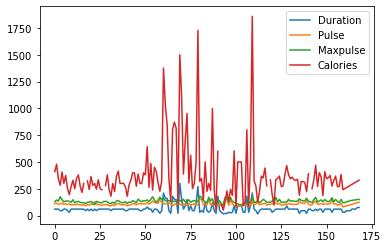

In [1]:
%matplotlib inline
import sys
import matplotlib
#matplotlib.use('Agg')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/opt/irisapp/misc/data.csv')

df.plot()

plt.show()


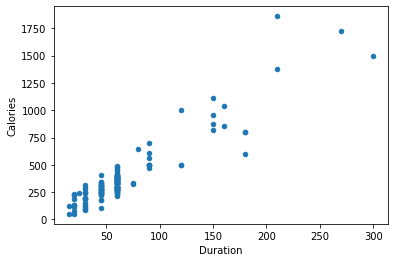

In [2]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
plt.show()


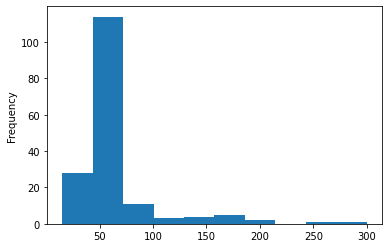

In [3]:
df["Duration"].plot(kind = 'hist')
plt.show()

# Tabla dentro del gráfico!

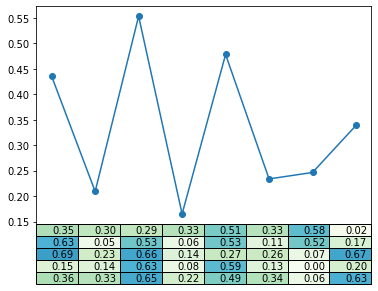

In [4]:
import numpy as np
# The following example has been taken from a tweet by Just Glowing Python(@JustGlowing) 
x = np.random.rand(5, 8)*.7
plt.plot(x.mean(axis=0), '-o', label='average per column')
plt.xticks([])
 
plt.table(cellText=[['%1.2f' % xxx for xxx in xx] for xx in x],cellColours=plt.cm.GnBu(x),loc='bottom')
 
plt.show()

# Línea temporal

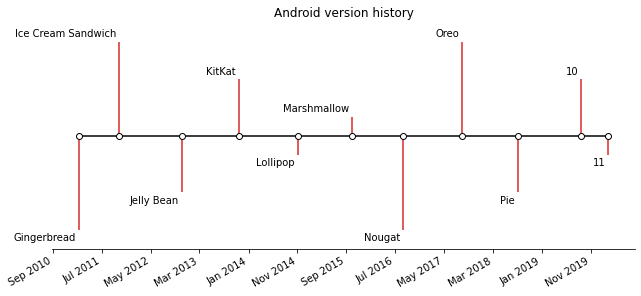

In [5]:
import matplotlib.dates as mdates
from datetime import datetime
 
names = ['Gingerbread', 'Ice Cream Sandwich', 'Jelly Bean', 'KitKat', 'Lollipop', 'Marshmallow',
             'Nougat', 'Oreo', 'Pie', '10', '11']
dates = ['2011-02-9', '2011-10-19', '2012-11-13', '2013-10-31',
             '2014-11-3', '2015-10-5', '2016-08-22', '2017-08-21',
             '2018-08-06', '2019-09-3', '2020-02-19']
 
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
 
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]
 
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Android version history")
markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline, mec="k", mfc="w", zorder=3)
 
# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))
 
# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
 
# format xaxis with 10 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=10))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
 
# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)
plt.show()

# xkcd

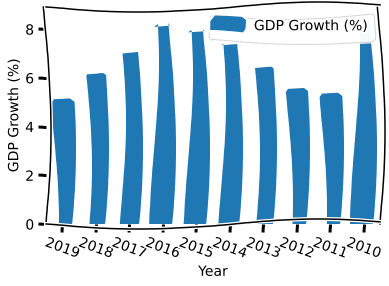

<Figure size 720x576 with 0 Axes>

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/parulnith/Website-articles-datasets/master/India%20GDP%20Growth%20Rate%20.csv', parse_dates=['Year'])
df['Year'] = df['Year'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
 
#calling xkcd() method
plt.xkcd(scale=5, length=400)
df.plot(x='Year',y='GDP Growth (%)',kind='bar')
plt.ylabel('GDP Growth (%)')
plt.xticks(rotation=-20)
plt.figure(figsize=(10,8))
plt.show()